In [18]:
# import librarry

import pandas as pd

In [19]:
# Load dataset

df = pd.read_csv('/content/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [20]:
# mengubah nama kolom

df = df.rename(columns={'Gender': 'gender',
                        'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#mengubah data kategori menjadi dat numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head()

<ipython-input-20-f9cee8fc45e3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
<ipython-input-20-f9cee8fc45e3>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [21]:
#delate kolom customer id dan gender

X = df.drop(['CustomerID', 'gender'], axis=1)

In [22]:
#import Algoritma
from sklearn.cluster import KMeans


In [23]:
#membuat list dari nilai  k 1-11 (inertia_)

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

In [24]:
from ast import increment_lineno
#import library untuk visualsast

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Inertia')

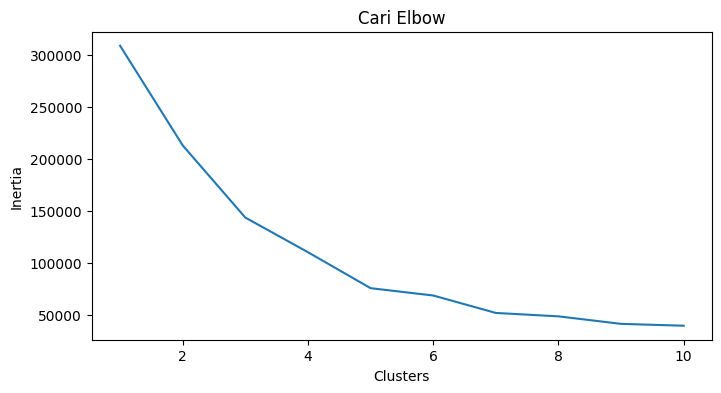

In [25]:
# membuat plot inertia

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [28]:
#membuat objek Kmeans

km5 = KMeans(n_clusters=5).fit(X)

# menambahkan plot KMeans dengan 5 klaster
X['labels'] = km5.labels_

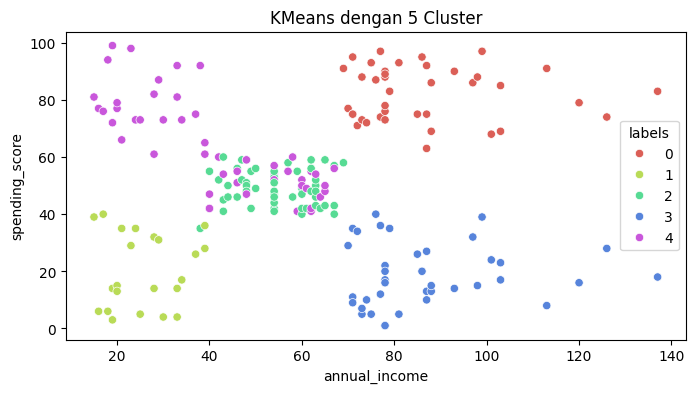

In [29]:
#Membuat plot KMeans dengan 5 klaster

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['labels'],
                                          palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')
plt.show()